# Using stochastic gradient descent to fit a line through 2 points 

Yes, I'm aware it might be slightly overkill.

In [1]:
import math
import operator
import random

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
# Data
X = [7, -3]

# Number of data points
N = len(X)

# Data dimension
d = 1

# Target
Y = [2, 4]

In [3]:
# Our two points
list(zip(X, Y))

[(7, 2), (-3, 4)]

## Model and Error definition

In [4]:
# Linear model
def f(w, x):

    # `w` stands for "weights".
    
    # Let w = [a, b]. Return f(x) = a * x + b
    # Hence, f(x) = a * x + b * 1
    # Let z = [x, 1], then f(x) = a * z[0] + b * z[1]
    # Or, f(x) = w[0] * z[0] + w[1] * z[1]

    z = (x, 1)
    return sum(w[j] * z[j] for j in range(d + 1))

In [5]:
# Error committed by the model (relatively to the target) for a given data point
def residual(w, x, y):
    return f(w, x) - y

# Loss function (sum of squared errors). Error committed by the model for all data points.
def loss(w, X, Y):
    return sum(residual(w, X[i], Y[i]) ** 2 for i in range(N))

**Goal:** Find `w` such that it minimizes `loss(w, X, Y)`.

## Stochastic gradient descent algorithm

https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

In [6]:
# Gradient of the loss function
def loss_gradient(w, x, y):
    z = (x, 1)
    return [2 * z[j] * residual(w, x, y) for j in range(d + 1)]

# Update rule for weights
def update(w, x, y, lr):
    # `lr` stands for "learning rate"
    grad = loss_gradient(w, x, y)
    updated_w = [w[j] - lr * grad[j] for j in range(d + 1)]
    return updated_w

In [7]:
def sgd(X, Y, initial_weights, lr):

    w = initial_weights
    
    while True:
        # Stochastic part of the algorithm: choose a data point at random for this iteration.
        i = random.randint(0, N - 1)
        x, y = X[i], Y[i]

        # Update weights
        w = update(w, x, y, lr)

        # Hopefully, loss decreased compared to previous iteration
        current_loss = loss(w, X, Y)
        
        yield w, current_loss

## Run algorithm

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [8]:
# Set learning rate
lr = 0.01

# Stop when loss is small enough
min_loss = 1e-8

# Alternatively, stop when a given number of steps is reached (in case the algorithm is diverging)
max_steps = 600

# Initialize weights
weights = [0, 0]

# Initialize algorithm

current_loss = 1
step = 0

loss_history = []
weights_history = []

gen = sgd(X, Y, weights, lr)

# Run algorithm

while current_loss > min_loss and step < max_steps:

    weights, current_loss = next(gen)

    weights_history.append(weights)
    loss_history.append(current_loss)

    step += 1

    # Pretty-printing ironically requires code that is not so pretty
    if step % 10 ** (len(str(step)) - 1) == 0 or step == max_steps or current_loss < min_loss:
        print('step %s, loss = %.10f' % (str(step).zfill(len(str(max_steps))), current_loss))

step 001, loss = 23.0400000000
step 002, loss = 18.4320000000
step 003, loss = 21.2336640000
step 004, loss = 16.9869312000
step 005, loss = 19.5689447424
step 006, loss = 15.6551557939
step 007, loss = 18.1599807209
step 008, loss = 16.8524621090
step 009, loss = 16.8524621090
step 010, loss = 13.4819696872
step 020, loss = 10.7912997324
step 030, loss = 6.8517602934
step 040, loss = 4.5883956098
step 050, loss = 3.4638649134
step 060, loss = 2.5336220575
step 070, loss = 2.0108526594
step 080, loss = 1.1766603559
step 090, loss = 0.8882827176
step 100, loss = 0.5037402135
step 200, loss = 0.0158897351
step 300, loss = 0.0007820327
step 400, loss = 0.0000110791
step 500, loss = 0.0000003437
step 600, loss = 0.0000000110


In [9]:
# Final weights
weights

[-0.19998952078257243, 3.399926645478007]

## Check that the model is actually right

In [10]:
for i in range(N):
    x, y = X[i], Y[i]
    print('f({x}) = {result} ≈ {y}'.format(x=X[i], result=f(weights, x), y=y))

f(7) = 1.9999999999999998 ≈ 2
f(-3) = 3.999895207825724 ≈ 4


## Plot loss history

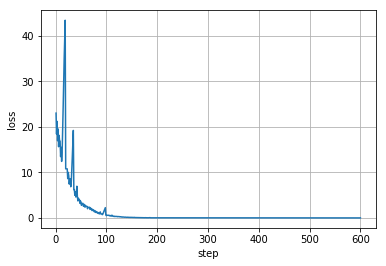

In [11]:
x_plot = list(range(1, len(loss_history) + 1))
y_plot = list(loss_history)

plt.plot(x_plot, y_plot)
plt.xlabel ('step')
plt.ylabel ('loss')
plt.grid()

plt.show()

## Plot weights history

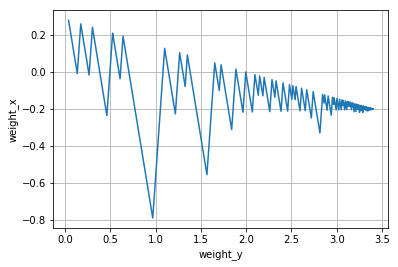

In [12]:
x_plot = list(map(operator.itemgetter(1), weights_history))
y_plot = list(map(operator.itemgetter(0), weights_history))

plt.plot(x_plot, y_plot)
plt.xlabel ('weight_y')
plt.ylabel ('weight_x')
plt.grid()

plt.show()